In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
import plotly.express as px
import plotly.graph_objects as go
from sklearn.neighbors import LocalOutlierFactor
sns.set(font_scale=1.2)

In [2]:
#tworzenie blobów

data = make_blobs(n_samples=300,cluster_std=2,random_state=10)[0]
data[:5]
tmp = pd.DataFrame(data,columns={'x1','x2'})
px.scatter(tmp,x='x1',y = 'x2',template='plotly_dark')

In [3]:
fig = go.Figure()
fig1 = px.density_heatmap(tmp,x='x1',y='x2',width=500,title='Outliners',nbinsx=20,nbinsy=20)
fig2 = px.scatter(tmp,x='x1',y='x2',width=500)

fig.add_trace(fig1['data'][0])
fig.add_trace(fig2['data'][0])
fig.update_layout(template = 'plotly_dark')
fig.show()

In [4]:
#Znajdowanie sąsiadów
def plot_lof(data,parameter,neighbors = 5):
	lof = LocalOutlierFactor(n_neighbors=neighbors)
	y_pred = lof.fit_predict(data)

	all_data = np.c_[data,y_pred]
	LOF_scores = lof.negative_outlier_factor_
	radius = (LOF_scores.max()-LOF_scores)/(LOF_scores.max()-LOF_scores.min())

	fig,ax = plt.subplots(figsize=(12,7))
	ax.text(0, 1, f'k_neighbors = {neighbors}\nsamples = {parameter[0]}\ncluster_std = {parameter[1]}\nrandom_state = {parameter[2]}',
        verticalalignment='top', horizontalalignment='left', fontsize=15,transform=ax.transAxes)
	ax.scatter(all_data[:,0],all_data[:,1],label='data',cmap='tab10')
	ax.scatter(all_data[:,0],all_data[:,1],s=2000*radius,edgecolors='r',facecolors='none',label = 'outliner scores')
	legend = plt.legend()
	legend.legendHandles[1]._sizes = [40]
	plt.show()

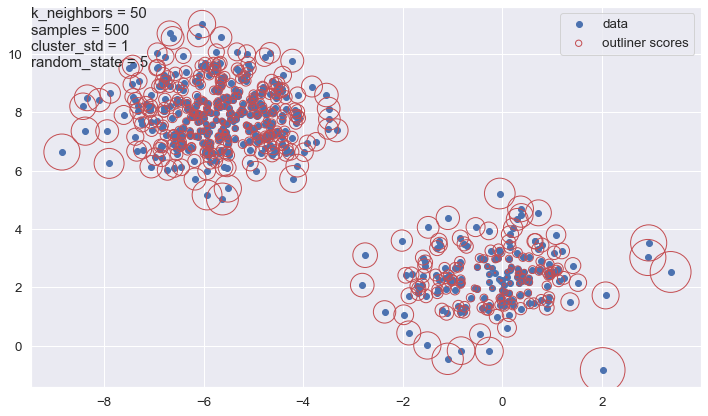

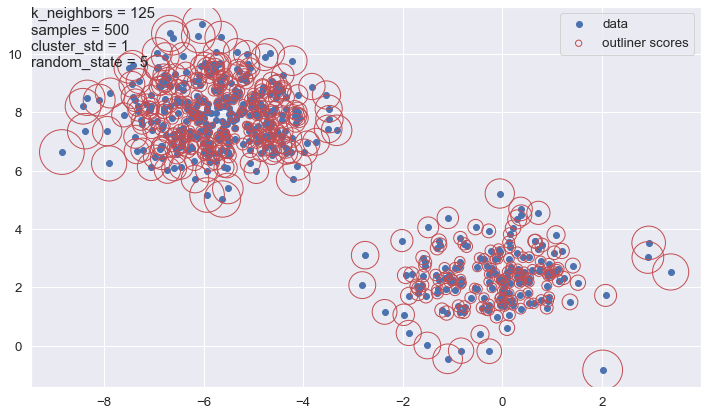

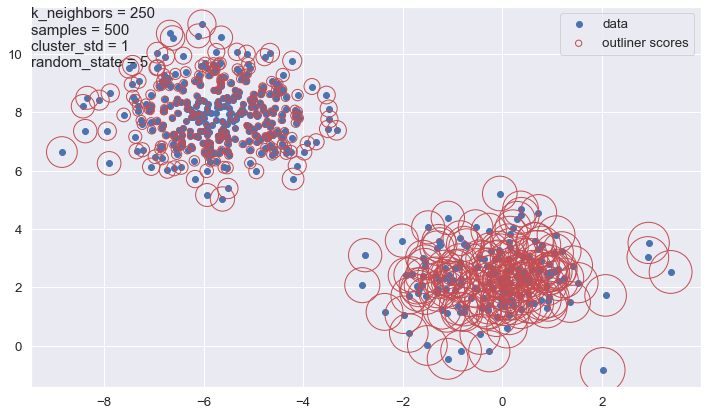

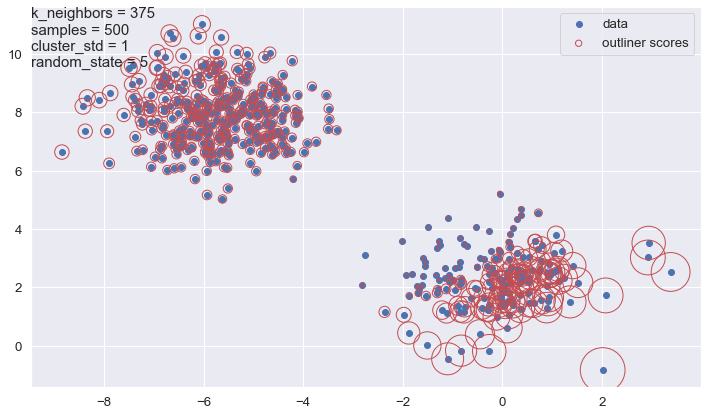

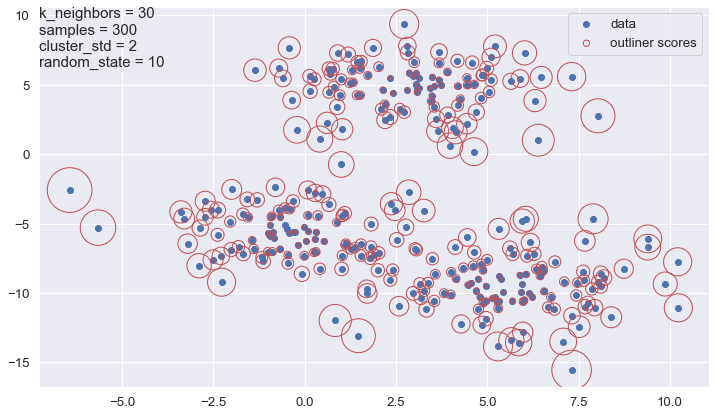

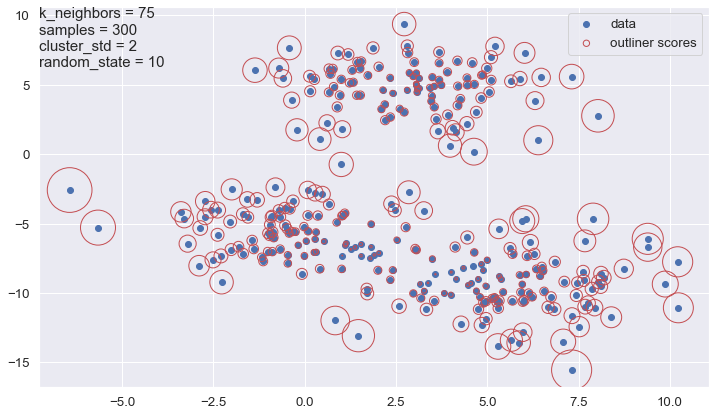

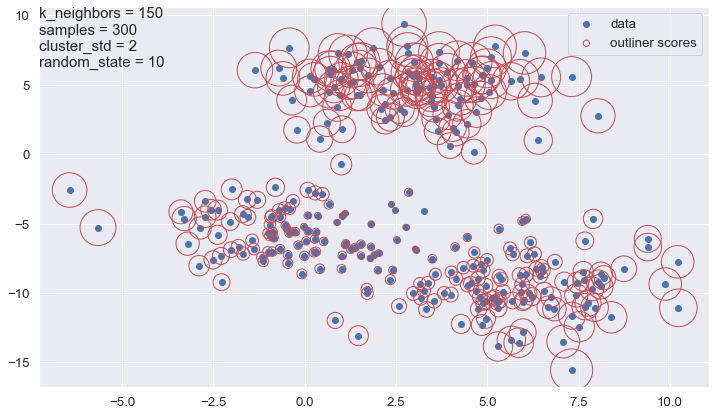

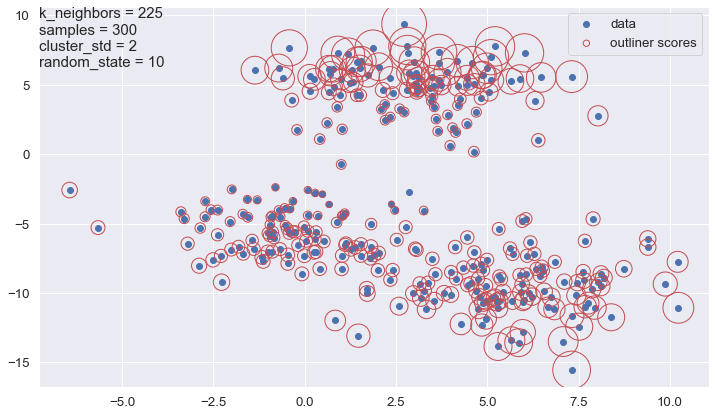

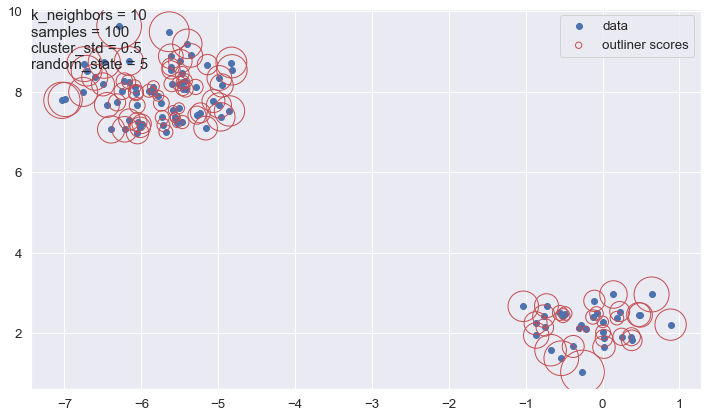

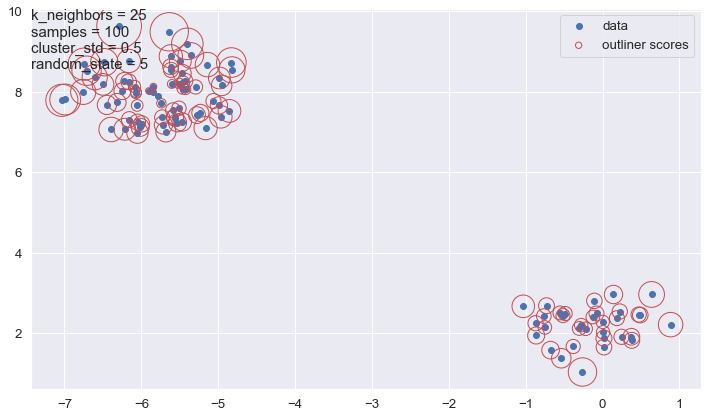

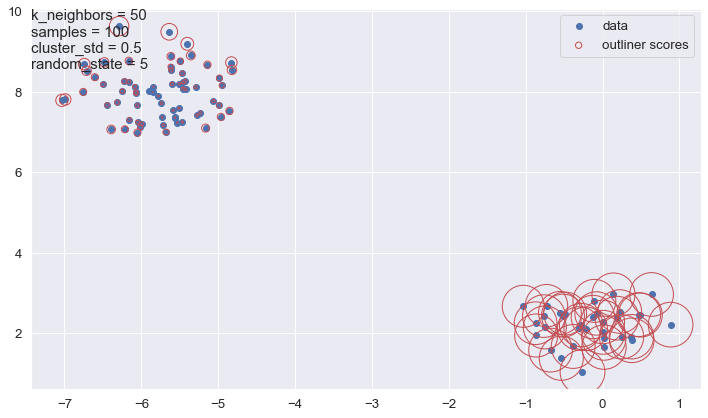

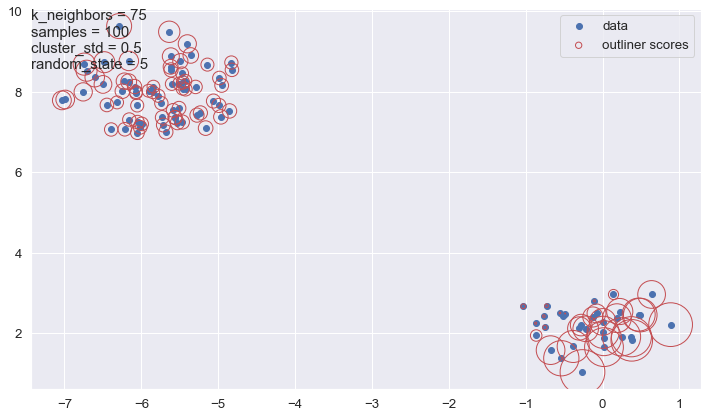

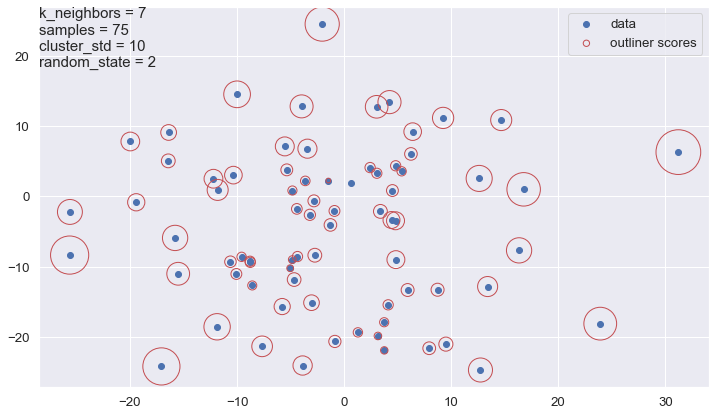

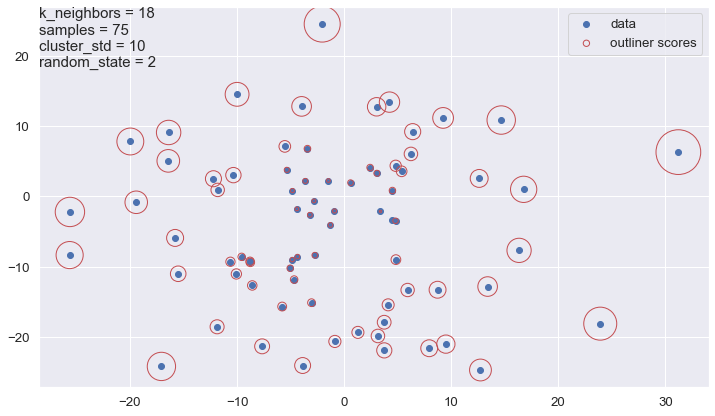

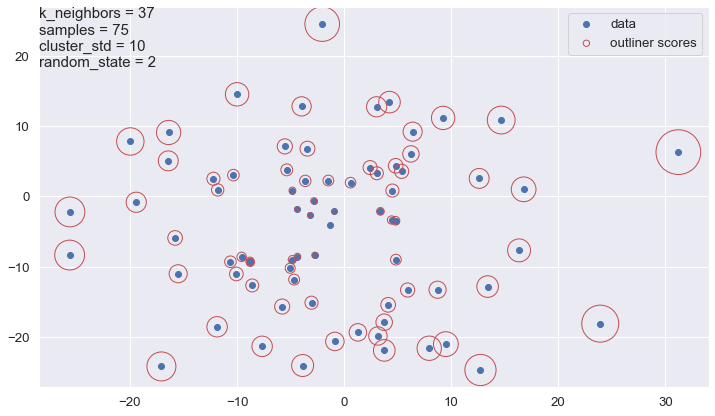

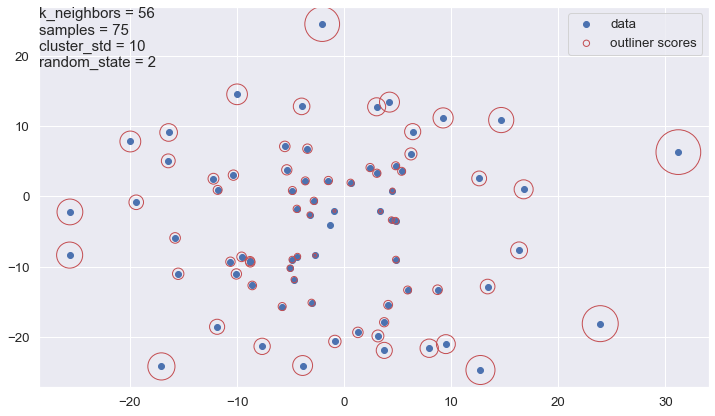

In [5]:
neighbors = [0.1,0.25,0.5,0.75]
blobs_parameters =[(500,1,5),(300,2,10),(100,0.5,5),(75,10,2)]
for parameter in blobs_parameters:
	data = make_blobs(n_samples=parameter[0],cluster_std=parameter[1],random_state=parameter[2])[0]
	for percent in neighbors:
		neighbor = (int) (parameter[0]*percent)
		plot_lof(data,parameter,neighbor)

(Zmiana random.seed nic nie zmienia, dla różnych danych trzeba zmienić cluster_std i random_state w metodzie make_blobs)
<br>
<br>
Najbardziej przejrzyste wyniki dają wartości większe niż 5, takie wartości skutecznie eliminują problem nie kwalifikowania małych grup po kilka wartości jako anomalii.
Maksymalna wartość jest zależna od rozproszenia danych, w przypadku danych bardziej rozproszonych większa liczba sąsiadów nie powoduje przesterowania. Wyniki dla wartości 1/4 i 3/4 liczby próbek są takie wręcz takie same.<br> Jednakże dla danych zbitych w wyraźne klastry większa ilość sąsiadów (>25% ilości próbek)  może spowodować przesterowanie i drastycznie zwiększać wartość LOF dla wartości znajdujących się w mniejszych klastrach